## Gathering the data

- Importing the necessary libraries to handle the data analysis and visualizations

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

- The data I need for this project resides on the World Bank server. They are provided as csv, excel or xml: <a href="https://data.worldbank.org/country/kenya">Example of the Kenya data</a>. 
- To download them programatically, I will use functions since I will need the same code to download data for each of the 4 countries. I choose to download the excel file.

In [3]:
import requests

def download_country_data(country_code):
    #url format for each download link
    url = f"https://api.worldbank.org/v2/en/country/{country_code}?downloadformat=excel"
    file = f"{country_code}_DATA.xls" #create its excel file
    response = requests.get(url) #response from the server
    try:
        with open(file, "wb") as f:
            f.write(response.content) #saving the response content, i.e. excel data
        print(f"data successfully downloaded for {country_code} into {file}")
        return file
    except Exception as e:
        print(f"server error or download failed with error: {e}")
    

- I will also need to convert the .xls file downloaded into a dataframe.
- Upon analysis, I discovered that the excel files have title of the data and the year it was recorded; this title spans 3 rows. The title is not important to my analysis, I will remove it within the function.
- The excel file contains 3 sheets: the data, metadata of the data and the origin or source of the data. Since I only need the data, I will return a Pandas dataframe of the first sheet.

In [4]:
import xlrd

def excel_to_df(country_code):
    try:
        file = download_country_data(country_code)
        if file is not None:
            #the excel files contain a title spanning 3 rows
            #it also contains 3 sheets, the first being the one with the data
            df = pd.read_excel(file, skiprows=3, sheet_name=0)
            return df
        else:
            print("error creating the file")
            return None
    except Exception as e:
        print(f"error {e} encountered")

- Reading the dataframes for each country:

In [5]:
# df_UG = excel_to_df('UGA')
df_UG = pd.read_excel("UGA_DATA.xls", skiprows=3, sheet_name=0)

In [6]:
# df_RW = excel_to_df('RWA')
df_RW = pd.read_excel("RWA_DATA.xls", skiprows=3, sheet_name=0)

In [7]:
# df_TZ = excel_to_df('TZA')
df_TZ = pd.read_excel("TZA_DATA.xls", skiprows=3, sheet_name=0)

In [8]:
# df_KE = excel_to_df('KEN')
df_KE = pd.read_excel("KEN_DATA.xls", skiprows=3, sheet_name=0)

- Testing out the dataframes have loaded data successfully.

In [9]:
df_UG.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1186,Uganda,UGA,Mineral rents (% of GDP),NY.GDP.MINR.RT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026934e-01,7.487042e-02,1.074218e-01,4.891117e-02,0.0,0.0,0.0,0.0,NaN,NaN
902,Uganda,UGA,ARI treatment (% of children under 5 taken to ...,SH.STA.ARIC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.130000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,Uganda,UGA,Adjusted savings: mineral depletion (current US$),NY.ADJ.DMIN.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.465222e+07,1.841345e+07,2.366679e+07,1.151085e+07,0.0,0.0,0.0,0.0,NaN,NaN


In [10]:
df_RW.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

## Assessing and Cleaning Data

- The data is presented in an unnatural way that will make querying the data complicated.

In [11]:
df_KE.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
993,Kenya,KEN,Employment in services (% of total employment)...,SL.SRV.EMPL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.227103,49.697545,50.154889,50.535145,50.999233,51.410730,51.085295,51.177109,51.785797,NaN
283,Kenya,KEN,Nitrous oxide (N2O) emissions from Agriculture...,EN.GHG.N2O.AG.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,11.533700,11.595200,12.590400,11.866000,12.141200,13.964000,14.422200,14.972600,15.585100,NaN
474,Kenya,KEN,Net ODA received (% of gross capital formation),DT.ODA.ODAT.GI.ZS,NaN,NaN,NaN,NaN,43.462612,50.215831,...,15.618392,15.894960,15.117825,14.631176,13.943336,16.337446,20.167087,14.201735,12.161177,NaN


- Here is a way to access a particular field and get a value for a certain year. The example here is the urban population growth percentage of Rwanda in the year 1961

In [12]:
indicator = "Urban population growth (annual %)"
row = df_RW[df_RW["Indicator Name"]==indicator]
value = row["1961"].values[0]
print(value)

4.812334794957718


- Due to the unnatural structure of the data, I need to make a function that gets a particular indicator and a year, and print out a scalar value. Otherwise, the code to query values can be repetitive and bulky.

In [13]:
def query(df, ind, yr):
    """df, ind as string, yr as number/string"""
    year = str(yr) #making sure the year is a string
    row = df[df["Indicator Name"]==ind]
    value = row[year].values[0]
    return value


In [14]:
query(df_RW, "Urban population growth (annual %)", "1961")

4.812334794957718

- Since the data has many null values for a particular year, the other issue will be comparing values of one country with another one which has a NaN value in that particular year.
- For example, Rwanda doesn't have an urban population growth recorded for 1960

In [15]:
query(df_RW, "Urban population growth (annual %)", 1960)

nan

- I will also need to query values within a range of years with a starting year to an end year; This will be accomplished by the function below.

In [16]:
def query_range(df, ind, start_yr, end_yr):
    """df, ind as string, yr as number/string"""
    values = [] ##the return array containing values
    years = [] #the return array containing years
    try:
        start_year = int(start_yr) #making sure the year is an integer
        end_year = int(end_yr) #making sure the year is an integer
    except:
        print("error converting to string")
    yrs = range(start_year, end_year)
    for year in yrs:
        year = str(year) #making it back to a string
        row = df[df["Indicator Name"]==ind]
        if not row.empty and year in row.columns:
            value = row[year].values[0]
            values.append(value) #push the values in an array
            years.append(year)
        else:
            values.append(None) #put none
            years.append(None) #put none
    return years, values

In [17]:
def removeNan(years, values):
    """Removing null values; takes years, values arrays"""
    cleaned_values = []
    cleaned_years = []
    # extract only non null rows for the tuple year, value
    for i in range(len(values)): 
        if not np.isnan(values[i]):
            #storing the values into respective arrays
            cleaned_values.append(values[i])
            cleaned_years.append(years[i])
    return cleaned_years,cleaned_values

In [53]:
def getCommon(years1, years2, values1, values2):
    """Get the common rows of two collections of data of years-values"""
    yrs1, yrs2, vals1, vals2 = [], [], [], []
    set_years2 = set(years2)
    #get equivalent year in the other data
    for i in range(len(years1)):
        for j in range(len(years2)):
            if years1[i] == years2[j]:
                yrs1.append(years1[i]) #update the yrs1 array
                vals1.append(values1[i]) #update the vals1 array
                yrs2.append(years2[j]) #update the yrs1 array
                vals2.append(values2[j]) #update the vals1 array
                break #move to the next i iteration
    return yrs1, yrs2, vals1, vals2

In [19]:
colors = {"RW":"green", "UG":"red", "TZ":"yellow", "KE":"black"}

In [20]:
df_countries_dict = {"df_RW": 'Rwanda', "df_UG": 'Uganda', "df_KE" : 'Kenya',"df_TZ" : 'Tanzania'}

## Exploring data

### Social
#### Urban Population Growth

Text(0.5, 1.0, 'Life expectancy at birth, total (years)')

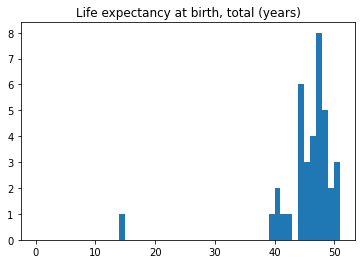

In [21]:
indicator = "Life expectancy at birth, total (years)"
years, values = query_range(df_RW, indicator, 1960, 2002)
plt.hist(x=values, bins=np.arange(0, max(values)))
plt.title(indicator)

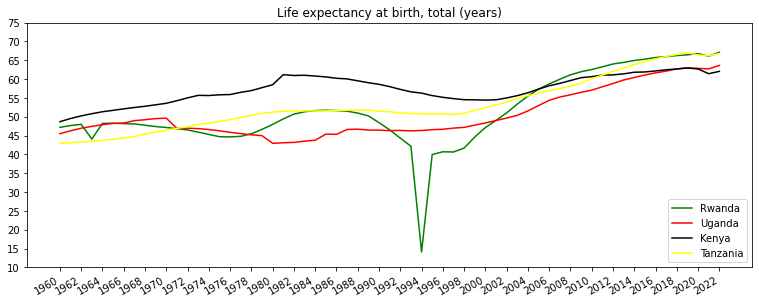

In [22]:
indicator = "Life expectancy at birth, total (years)"
fig, ax1 = plt.subplots(figsize=(13,5))
years, values = query_range(df_RW, indicator, 1960, 2023)
line1, = ax1.plot(years, values, label="Rwanda", color=colors["RW"])
# plt.plot(years, values)
#showing the title and centering it
ax1.set_title(f"{indicator}", loc="center")
#plot the Uganda plot
years, values = query_range(df_UG, indicator, 1960, 2023)
line2, = ax1.plot(years, values, label="Uganda", color=colors["UG"])
#plot the Kenya plot
years, values = query_range(df_KE, indicator, 1960, 2023)
line3, = ax1.plot(years, values, label="Kenya", color=colors["KE"])
#plot the Tanzania plot
years, values = query_range(df_TZ, indicator, 1960, 2023)
line4, = ax1.plot(years, values, label="Tanzania", color=colors["TZ"])
#adding more details in y axis
y_ticks = np.arange(10,80,5)
ax1.set_yticks(y_ticks)
#rotating the date label
fig.autofmt_xdate()
ax1.set_xticks(years[::2]) #skipping 2 years
#adding the legend
ax1.legend(loc="lower right")
#showing the plot
plt.show()

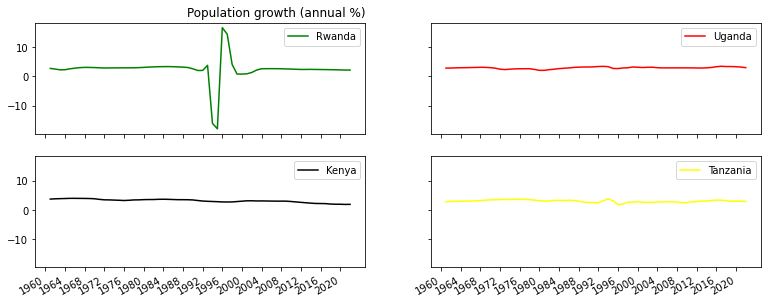

In [23]:
indicator = "Population growth (annual %)"
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(13,5), sharex=True, sharey=True)
years, values = query_range(df_RW, indicator, 1960, 2023)
ax1.plot(years, values, label="Rwanda", color=colors["RW"])
# plt.plot(years, values)
#showing the title and centering it
ax1.set_title(f"{indicator}", loc="right")
#plot the Uganda plot
years, values = query_range(df_UG, indicator, 1960, 2023)
ax2.plot(years, values, label="Uganda", color=colors["UG"])
#plot the Kenya plot
years, values = query_range(df_KE, indicator, 1960, 2023)
ax3.plot(years, values, label="Kenya", color=colors["KE"])
#plot the Tanzania plot
years, values = query_range(df_TZ, indicator, 1960, 2023)
ax4.plot(years, values, label="Tanzania", color=colors["TZ"])
#adding a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
#rotating the date label
fig.autofmt_xdate()
ax1.set_xticks(years[::4])
#showing the plot
plt.show()

In [24]:
indicator = "Mortality rate, infant, female (per 1,000 live births)"
arr = []
# for df in [df_RW, df_UG, df_KE, df_TZ]:
print(indicator)
#Rwanda
years, mort = query_range(df_RW,indicator,1960,2023)
country = df_countries_dict['df_RW']
mean = np.nanmean(mort)
arr.append({country:mean})
#Uganda
years, mort = query_range(df_UG,indicator,1960,2023)
country = df_countries_dict['df_UG']
mean = np.nanmean(mort)
arr.append({country:mean})
#Kenya
years, mort = query_range(df_KE,indicator,1960,2023)
country = df_countries_dict['df_KE']
mean = np.nanmean(mort)
arr.append({country:mean})
#Tanzania
years, mort = query_range(df_TZ,indicator,1960,2023)
country = df_countries_dict['df_TZ']
mean = np.nanmean(mort)
arr.append({country:mean})
for entry in arr:
    print(f"{entry}")

Mortality rate, infant, female (per 1,000 live births)
{'Rwanda': 90.62063492063493}
{'Uganda': 84.92857142857147}
{'Kenya': 59.450793650793635}
{'Tanzania': 83.99047619047617}


#### Migration

Refugee population by country or territory of asylum
Population growth (annual %)

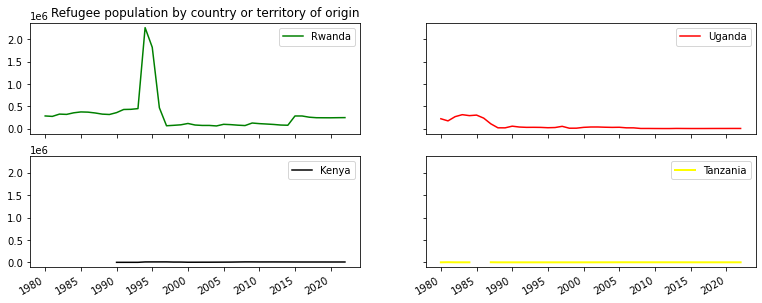

In [25]:
indicator = "Refugee population by country or territory of origin"
start_year = 1980
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(13,5), sharex=True, sharey=True)
years, values = query_range(df_RW, indicator, start_year, 2023)
ax1.plot(years, values, label="Rwanda", color=colors["RW"])
# plt.plot(years, values)
#showing the title and centering it
ax1.set_title(f"{indicator}", loc="right")
#plot the Uganda plot
years, values = query_range(df_UG, indicator, start_year, 2023)
ax2.plot(years, values, label="Uganda", color=colors["UG"])
#plot the Kenya plot
years, values = query_range(df_KE, indicator, start_year, 2023)
ax3.plot(years, values, label="Kenya", color=colors["KE"])
#plot the Tanzania plot
years, values = query_range(df_TZ, indicator, start_year, 2023)
ax4.plot(years, values, label="Tanzania", color=colors["TZ"], lw=2)
#adding a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
#rotating the date label
fig.autofmt_xdate()
ax1.set_xticks(years[::5])
#showing the plot
plt.show()

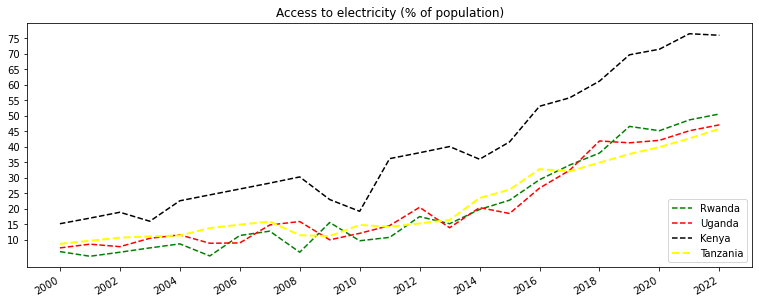

In [26]:
indicator = "Access to electricity (% of population)"
start_year = 2000
fig, ax1 = plt.subplots(figsize=(13,5))
years, values = query_range(df_RW, indicator, start_year, 2023)
line1, = ax1.plot(years, values, linestyle="--", label="Rwanda", color=colors["RW"])
# plt.plot(years, values)
#showing the title and centering it
ax1.set_title(f"{indicator}", loc="center")
#plot the Uganda plot
years, values = query_range(df_UG, indicator, start_year, 2023)
line2, = ax1.plot(years, values,linestyle="--", label="Uganda", color=colors["UG"])
#plot the Kenya plot
years, values = query_range(df_KE, indicator, start_year, 2023)
line3, = ax1.plot(years, values,linestyle="--", label="Kenya", color=colors["KE"])
#plot the Tanzania plot
years, values = query_range(df_TZ, indicator, start_year, 2023)
line4, = ax1.plot(years, values,linestyle="--", label="Tanzania",lw=2, color=colors["TZ"])
#adding more details in y axis
y_ticks = np.arange(10,80,5)
ax1.set_yticks(y_ticks)
#rotating the date label
fig.autofmt_xdate()
ax1.set_xticks(years[::2]) #skipping 2 years
#adding the legend
ax1.legend(loc="lower right")
#showing the plot
plt.show()

- According to the definition given by the author of the data, Country of origin generally refers to the nationality or country of citizenship of a claimant.

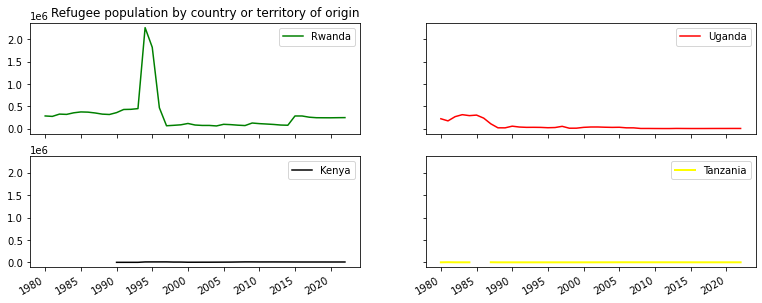

In [27]:
indicator = "Refugee population by country or territory of origin"
start_year = 1980
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(13,5), sharex=True, sharey=True)
years, values = query_range(df_RW, indicator, start_year, 2023)
ax1.plot(years, values, label="Rwanda", color=colors["RW"])
# plt.plot(years, values)
#showing the title and centering it
ax1.set_title(f"{indicator}", loc="right")
#plot the Uganda plot
years, values = query_range(df_UG, indicator, start_year, 2023)
ax2.plot(years, values, label="Uganda", color=colors["UG"])
#plot the Kenya plot
years, values = query_range(df_KE, indicator, start_year, 2023)
ax3.plot(years, values, label="Kenya", color=colors["KE"])
#plot the Tanzania plot
years, values = query_range(df_TZ, indicator, start_year, 2023)
ax4.plot(years, values, label="Tanzania", color=colors["TZ"], lw=2)
#adding a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
#rotating the date label
fig.autofmt_xdate()
ax1.set_xticks(years[::5])
#showing the plot
plt.show()

In [56]:
indicator = "School enrollment, primary, female (% gross)"
years, completed = query_range(df_RW, indicator, 1980, 2022)
years, completed = removeNan(years, completed) #removing nan values
#for 2nd indicator
indicator = "Primary completion rate, female (% of relevant age group)"
years2, completed2 = query_range(df_RW, indicator, 1980, 2022)
years2, completed2 = removeNan(years2, completed2) #removing nan values
years,years2,completed,completed2 = getCommon(years,years2,completed,completed2)

0

In [55]:
indicator = "Primary completion rate, female (% of relevant age group)"
years2, completed2 = query_range(df_RW, indicator, 1980, 2022)
years2, completed2 = removeNan(years2, completed2) #removing nan values
len(years2)

31

Primary school starting age (years)
School enrollment, primary and secondary (gross), gender parity index (GPI)
Primary completion rate, total (% of relevant age group) bar chart in one subplot
Lower secondary school starting age (years)
School enrollment, secondary, female (% gross), School enrollment, secondary, male (% net)
Women Business and the Law Index Score (scale 1-100)